In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
pi = 3.141592
m = 1
gamma = 0



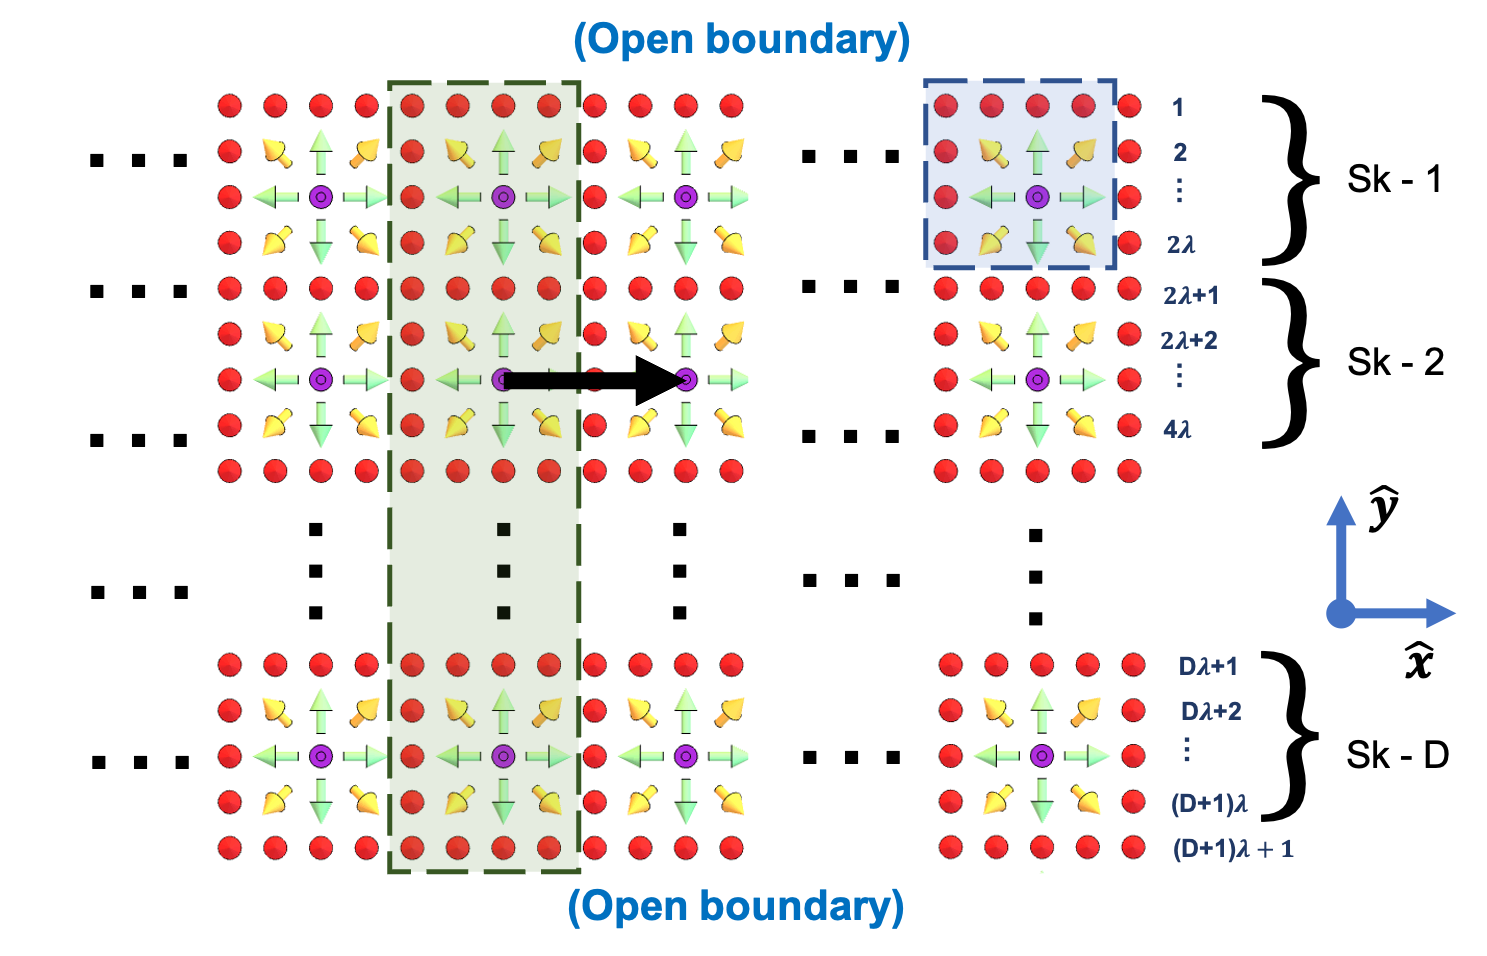

*Figure 1: This is the square skyrmion nanoribbon. The highlighted green box is the nanoribbon unit cell. The blue highlighting box is the normal skyrmion unitcell in a 2D periodic crystal.*

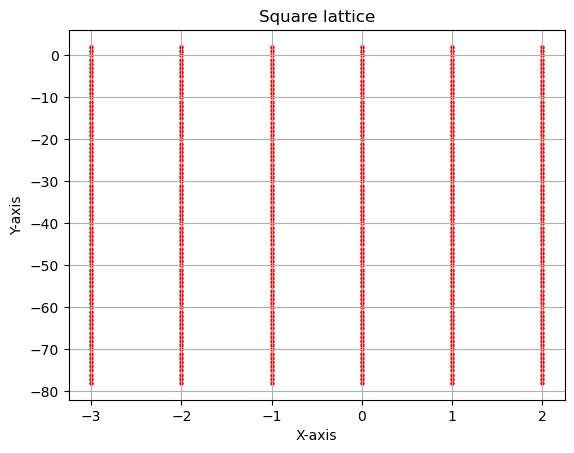

In [2]:
# Defining the Base lattice  - (SQUARE LATICE)
# lattice translation vectors
A1 = [1, 0]
A2 = [0, 1]

# Dimensions
lamda = 2 # skyrmion radius
D = 20 # no. of Skyrmions in the nano-ribbon unitcell

# Lattice generation and visualization
sqX_x = []
sqX_y = []
for col in range(-((D-1)*2*lamda)-lamda, lamda + 1):
    for row in range(-lamda -1 , lamda + 1 ):
        sqX_x.append((A1[0] * row) + (A2[0] * col))
        sqX_y.append((A1[1] * row) + (A2[1] * col))
#print(sqX_x)
#print(sqX_y)
# Plot the points
g = plt.figure();
plt.scatter(sqX_x, sqX_y, color='red', s=5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Square lattice')
plt.grid(True)
plt.show()

In [3]:
# Flatten the position matrix into tuples
pos = [(col - lamda, lamda - row) for row in range(2 * lamda) for col in range(2 * lamda)]
#print(pos)

# distance array
r = [np.sqrt((pos[i][0])**2 + (pos[i][1])**2) for i in range((2*lamda)**2)]
#print(r)

# theta array
theta = [] 
for i in range((2*lamda)**2):
    if r[i] <= lamda :
        theta.append(np.pi*(1 - (r[i])/lamda))
    else :
        theta.append(0) 
#print(theta)

# alpha array calculation(radians):
alpha = []
for i in range((2*lamda)**2):   
    x = pos[i][0] 
    y = pos[i][1]
    if x==0 and y==0:
        alpha.append(0) 
    elif x == 0 and y > 0:
        alpha.append(np.pi/2) 
    elif x == 0 and y < 0:
        alpha.append(3*np.pi/2) 
    elif y == 0 and x > 0:
        alpha.append(0)
    elif y == 0 and x < 0:
        alpha.append(np.pi)   
    elif x > 0 and y > 0:
        alpha.append(np.arctan(y/x)) #first quadrant
    elif x < 0 and y < 0:
        alpha.append(np.pi + np.arctan(y/x)) #third quadrant
    elif x > 0 and y < 0:
        alpha.append(2*np.pi - np.arctan(abs(y/x))) #fourth quadrant 
    elif x < 0 and y > 0: 
        alpha.append((np.pi/2) + np.arctan(abs(y/x))) #second quadrant
#print(alpha) 

#phi definition 
phi = [(m * alpha[i]) + gamma for i in range((2*lamda)**2)]
#print(phi) 

324


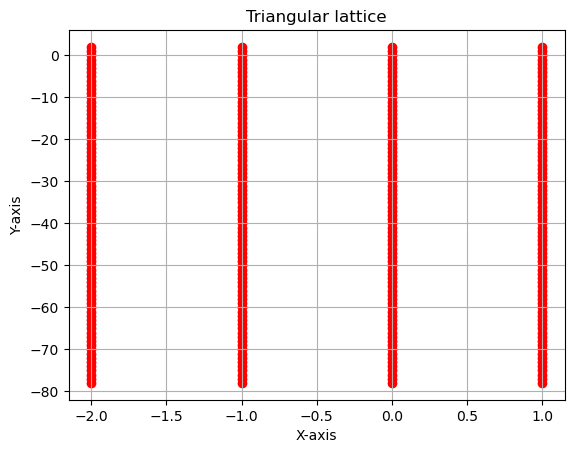

In [4]:
# unit cell of the skyrmion nano-ribbon
unitcell_x = []
unitcell_y = []
# Bounds of unit cell
Xlow = -lamda - 0.5
Xhigh = lamda - 0.5
Ylow = -((2*D) + 1)*lamda  - 0.5
Yhigh = lamda + 0.5
for i in range(len(sqX_x)):
    [x, y] = [sqX_x[i], sqX_y[i]]
    if x >= Xlow and x < Xhigh and y >= Ylow and y < Yhigh:
        unitcell_x.append(x)  
        unitcell_y.append(y)

#print(unitcell_x)
print(len(unitcell_y))

g = plt.figure();
plt.scatter(unitcell_x, unitcell_y, color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Triangular lattice')
plt.grid(True)
plt.show()

In [5]:
# skyrmion profile for the nano-ribbon unit cell

def index(x, y, m):
    for j in range((2*lamda)**2):
        x1 = pos[j][0]
        y1 = pos[j][1]
        if [x, y + 2*lamda*m] == [x1, y1]:
            prof_index.append(j)
    return

prof_index = []
for i in range(len(unitcell_x)):
    x = unitcell_x[i]
    y = unitcell_y[i]
    for m in range(D+1):
        index(x, y, m)
    
print(len(prof_index))
#print(prof_index)

324


In [6]:
# eigen ket and bra vectors
chi_ket = []
chi_bra = []
for i in range(len(unitcell_x)):
    m = prof_index[i]
    chi_ket.append([np.cos(theta[m]/2), np.sin(theta[m]/2) * np.exp(1j * phi[m])])
    chi_bra.append([np.cos(theta[m]/2), np.sin(theta[m]/2) * np.exp(-1j * phi[m])])


In [7]:
# neighbour table formation
# translation vector
Tx = [2*lamda, 0]
D1 = [1, 0]
D2 = [-1, 0]
D3 = [0, 1]
D4 = [0, -1]
NN1 = []
NN2 = []
NN3 = []
NN4 = []

def neig_1(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D1[0] , y + D1[1]]):
        NN1.append(j)
    elif np.allclose([x1, y1], [x + D1[0] - Tx[0], y + D1[1] - Tx[1]]):
        NN1.append(j)
    return 

def neig_2(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D2[0] , y + D2[1]]):
        NN2.append(j)
    elif np.allclose([x1, y1], [x + D2[0] + Tx[0], y + D2[1] + Tx[1]]):
        NN2.append(j)
    return 

def neig_3(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D3[0] , y + D3[1]]):
        NN3.append(j)
    elif np.allclose([x1, y1],[x + D3[0] , y + D3[1] - (2*lamda*D) - 1 ]):
        NN3.append(None)
    return 

def neig_4(i, j):
    [x, y] = [unitcell_x[i], unitcell_y[i]]
    [x1, y1] = [unitcell_x[j], unitcell_y[j]]
    # NN1 
    if np.allclose([x1, y1],[x + D4[0] , y + D4[1]]):
        NN4.append(j)
    elif np.allclose([x1, y1],[x + D4[0] , y + D4[1] + (2*lamda*D) + 1 ]):
        NN4.append(None)
    return 

for i in tqdm(range(len(unitcell_x))):
    for j in range(len(unitcell_x)):
        neig_1(i, j)
        neig_2(i, j)
        neig_3(i, j)
        neig_4(i, j)

#print(NN1)
#print(NN2)
#print(NN3)
#print(NN4)

100%|██████████| 324/324 [00:20<00:00, 15.72it/s]


In [8]:
# Hamiltonian definition
t = 1
#ras = 0.0

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)

def H(kx, ras):
    k = [kx, 0]
    Hij = np.zeros((len(unitcell_x),len(unitcell_x)), dtype=np.complex128)
    for i in range(len(unitcell_x)):
        n1, n2 = int(NN1[i]), int(NN2[i])  
        Hij[i][n1] = t * np.exp(1j * np.dot(k, D1)) * np.dot(chi_bra[i], chi_ket[n1]) + (np.exp(1j * np.dot(k, D1)) * ras * 1j * np.dot(chi_bra[i], np.dot(((D1[1]*sigma_x) - (D1[0]*sigma_y)), chi_ket[n1])))
        Hij[i][n2] = t * np.exp(1j * np.dot(k, D2)) * np.dot(chi_bra[i], chi_ket[n2]) + (np.exp(1j * np.dot(k, D2)) * ras * 1j * np.dot(chi_bra[i], np.dot(((D2[1]*sigma_x) - (D2[0]*sigma_y)), chi_ket[n2])))
    for i in range(len(unitcell_x)): 
        n3, n4 = NN3[i], NN4[i] 
        if n3 is not None : 
            n3 = int(n3)
            Hij[i][n3] = t * np.dot(chi_bra[i], chi_ket[n3]) + (ras * 1j * np.dot(chi_bra[i], np.dot(((D3[1]*sigma_x) - (D3[0]*sigma_y)), chi_ket[n3])))
        if n4 is not None :
            n4 = int(n4)
            Hij[i][n4] = t * np.dot(chi_bra[i], chi_ket[n4]) + (ras * 1j * np.dot(chi_bra[i], np.dot(((D4[1]*sigma_x) - (D4[0]*sigma_y)), chi_ket[n4])))
    return Hij 

In [9]:
BZ = np.linspace(-(np.pi)/((2*lamda)), (np.pi)/((2*lamda)), 100)

band = np.zeros((len(unitcell_x), len(BZ)))
for i in tqdm(range(0, len(BZ))):
    eigen = np.linalg.eigvalsh(H(BZ[i], 0.0))
    for b_index in range(0, len(unitcell_x)):
        band[b_index][i] = eigen[b_index]


100%|██████████| 100/100 [00:07<00:00, 12.52it/s]


(-3.6, -0.75)

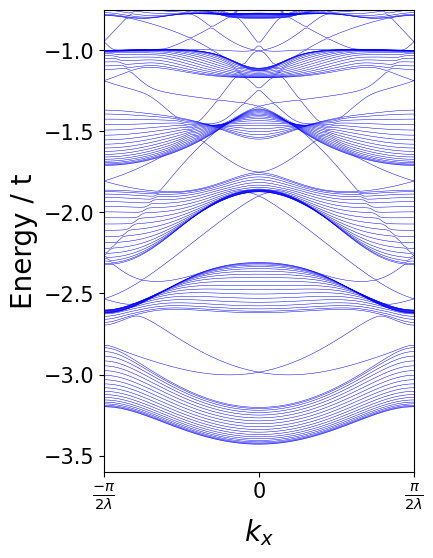

In [10]:
f = plt.figure(figsize=(4,6));   
for b_index in range(0, len(unitcell_x)):
    plt.plot( BZ, band[b_index], c = 'blue', linestyle='-', linewidth = 0.35 )
plt.xlabel("$k_x$", fontsize=20);plt.axis('tight');
plt.ylabel("Energy / t", fontsize=20);
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)
plt.xticks([BZ[0], 0, BZ[-1]],[r'$\frac{-\pi}{2\lambda}$', 0,  r'$\frac{\pi}{2\lambda}$'],fontsize=15)
plt.xlim(BZ[0], BZ[-1])
plt.ylim(-3.6, -0.75)


In [11]:
def sorted_kets(kx, ras):
    eigenvalues, eigenvectors = np.linalg.eigh(H(kx, ras))
    a = np.transpose(eigenvectors)
    return a

In [12]:
BZ = np.linspace(-(np.pi)/((2*lamda)), (np.pi)/((2*lamda)), 100)
eigen_ket1 = np.zeros(len(unitcell_x))
eigen_ket2 = np.zeros(len(unitcell_x))

band_index = 19

for i in tqdm(range(len(BZ))):
    ket1 = sorted_kets(BZ[i], 0.0)[band_index]
    ket2 = sorted_kets(BZ[i], 0.5)[band_index]
    for j in range(len(unitcell_x)):
        eigen_ket1[j] += abs(ket1[j])**2
        eigen_ket2[j] += abs(ket2[j])**2
        
ele_prob1 = [eigen_ket1[i]/len(BZ)  for i in range(len(unitcell_x))]
ele_prob2 = [eigen_ket2[i]/len(BZ)  for i in range(len(unitcell_x))]
print(np.sum(ele_prob1))
print(np.sum(ele_prob2))

100%|██████████| 100/100 [00:17<00:00,  5.59it/s]

1.0000000000000002
1.0000000000000004


1.0000000000000002
1.0000000000000004


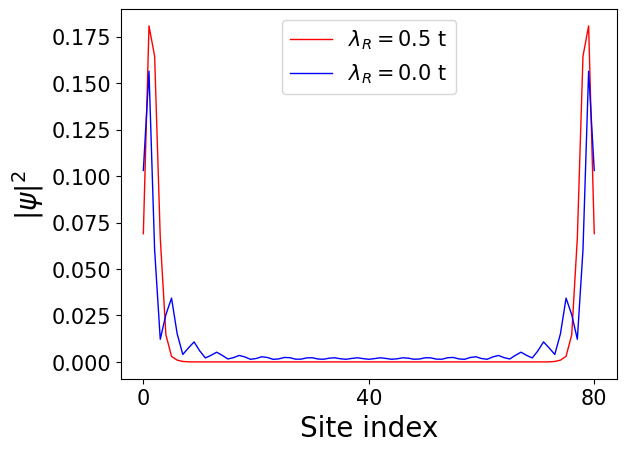

In [13]:
x_list = np.zeros((2*lamda, int(len(unitcell_x)/(2*lamda))))
y_list = np.zeros((2*lamda, int(len(unitcell_x)/(2*lamda))))
e_prob1 = np.zeros((2*lamda, int(len(unitcell_x)/(2*lamda))))
e_prob2 = np.zeros((2*lamda, int(len(unitcell_x)/(2*lamda))))

x_value = [(-lamda + i) for i in range(2*lamda)]
for val in range(len(x_value)):
    count = 0
    for i in range(len(unitcell_x)):
        if unitcell_x[i] == x_value[val]:
            x_list[val][count] = unitcell_x[i]
            y_list[val][count] = unitcell_y[i]
            e_prob1[val][count] = ele_prob1[i]
            e_prob2[val][count] = ele_prob2[i]
            count = count + 1
            
prob1 = [e_prob1[0][i] + e_prob1[1][i] + e_prob1[2][i] + e_prob1[3][i] for i in range(int(len(unitcell_x)/(2*lamda)))]
prob2 = [e_prob2[0][i] + e_prob2[1][i] + e_prob2[2][i] + e_prob2[3][i] for i in range(int(len(unitcell_x)/(2*lamda)))]
#print(y_list)

f = plt.figure(); 
plt.plot( y_list[1], prob2, c = 'red', linestyle='-', linewidth = 1 ,  label = '$\lambda_R = 0.5$ t')
plt.plot( y_list[1], prob1, c = 'blue', linestyle='-', linewidth = 1 , label = '$\lambda_R = 0.0$ t')
#plt.scatter( y_list[1], prob, c = 'blue', s = 10 )

#plt.scatter( y_list, e_prob2, c = 'red', s = 10)
#plt.title('( x = ' + str(x_value)+ ' ) plane', fontsize = 20)
plt.ylabel('$|\psi|^2$', fontsize = 20);
plt.xlabel('Site index', fontsize = 20);
plt.legend(fontsize = 15)
# Customize x-axis ticks with Greek symbols
plt.yticks(fontsize = 15)
val = ((2*D))*lamda
plt.xticks([lamda , -(D-1)*lamda,  -((2*D)-1)*lamda],[val, int(val/2), 0],fontsize=15)
#plt.xlim(BZ[0], BZ[-1])
#plt.ylim(-3.6, -0.75)

print(np.sum(prob1))
print(np.sum(prob2))